In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/taraross/Desktop/all/DataAnalytics/Tasks/Achievement 6'

In [4]:
df = pd.read_csv(os.path.join(path, 'USETHIS', 'listings_clean.csv'))

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,4952,Place to stay in Palo Alto · ★4.81 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43932,-122.15741,Private room,65.0,7,84,10/28/23,0.48,5,253,7
1,11464,Rental unit in Santa Clara · ★4.50 · Studio · ...,42458,Emey,Santa Clara,37.34415,-121.98701,Entire home/apt,94.0,3,20,8/5/23,0.17,13,152,4
2,21373,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43972,-122.15532,Private room,67.0,7,266,9/16/23,1.61,5,300,5
3,62799,Place to stay in Palo Alto · ★4.89 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43934,-122.15723,Private room,83.0,7,157,12/16/23,1.35,5,309,6
4,75284,Place to stay in Palo Alto · ★4.87 · 1 bedroom...,7054,Mei Lin,Palo Alto,37.43923,-122.15745,Private room,70.0,7,214,12/11/23,1.39,5,302,6


In [13]:
df_use = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']]

In [14]:
df_use.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,37.43932,-122.15741,65.0,7,84,0.48,5,253,7
1,37.34415,-121.98701,94.0,3,20,0.17,13,152,4
2,37.43972,-122.15532,67.0,7,266,1.61,5,300,5
3,37.43934,-122.15723,83.0,7,157,1.35,5,309,6
4,37.43923,-122.15745,70.0,7,214,1.39,5,302,6


In [39]:
df_use = df_use[df_use['price'] < 5000]

In [40]:
df_use.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,clusters
0,37.43932,-122.15741,65.0,7,84,0.48,5,253,7,0
1,37.34415,-121.98701,94.0,3,20,0.17,13,152,4,0
2,37.43972,-122.15532,67.0,7,266,1.61,5,300,5,0
3,37.43934,-122.15723,83.0,7,157,1.35,5,309,6,0
4,37.43923,-122.15745,70.0,7,214,1.39,5,302,6,0


## The Elbow Technique

In [41]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [42]:
score = [kmeans[i].fit(df_use).score(df_use) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

[-354482929.2234892,
 -236815708.0200716,
 -173686419.08023858,
 -127759615.81946695,
 -103899826.92001522,
 -90054902.45077874,
 -77191287.55228429,
 -67385452.01750644,
 -58288064.32750122]

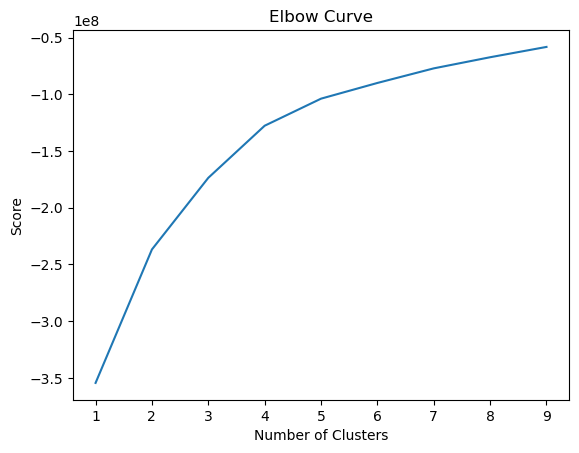

In [43]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is 4.

## k-means clustering

In [58]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [59]:
# Fit the k-means object to the data.

kmeans.fit(df_use)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [60]:
df_use['clusters'] = kmeans.fit_predict(df_use)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
df_use.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,clusters
0,37.43932,-122.15741,65.0,7,84,0.48,5,253,7,0
1,37.34415,-121.98701,94.0,3,20,0.17,13,152,4,2
2,37.43972,-122.15532,67.0,7,266,1.61,5,300,5,0
3,37.43934,-122.15723,83.0,7,157,1.35,5,309,6,0
4,37.43923,-122.15745,70.0,7,214,1.39,5,302,6,0


In [62]:
df_use['clusters'].value_counts()

clusters
2    2448
0    2030
3     335
1      27
Name: count, dtype: int64

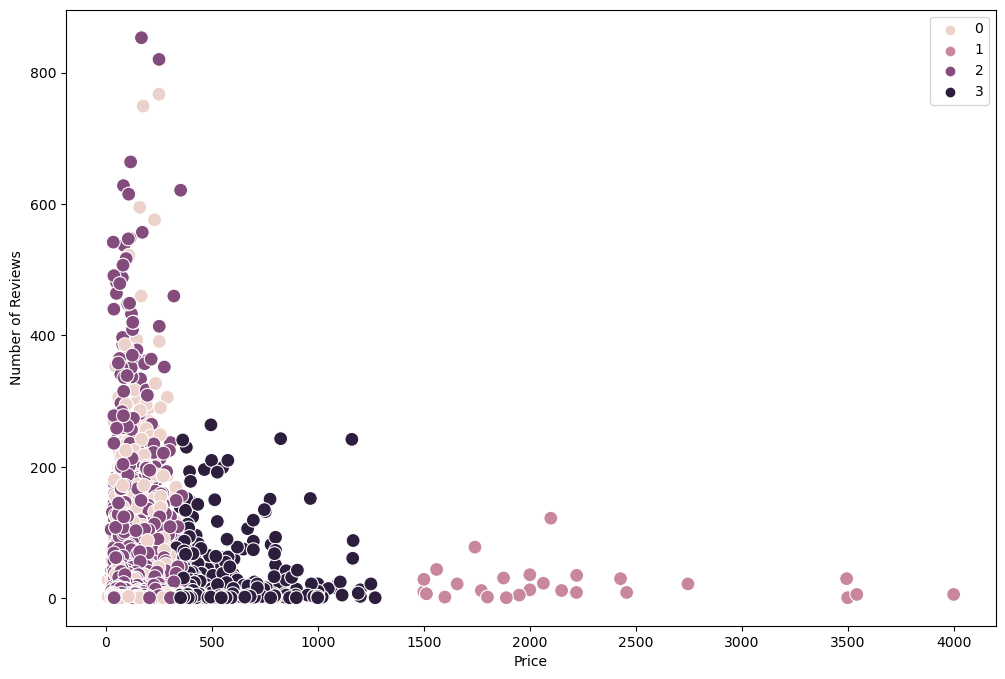

In [63]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_use['price'], y=df_use['number_of_reviews'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Number of Reviews') # Label y-axis.
plt.show()

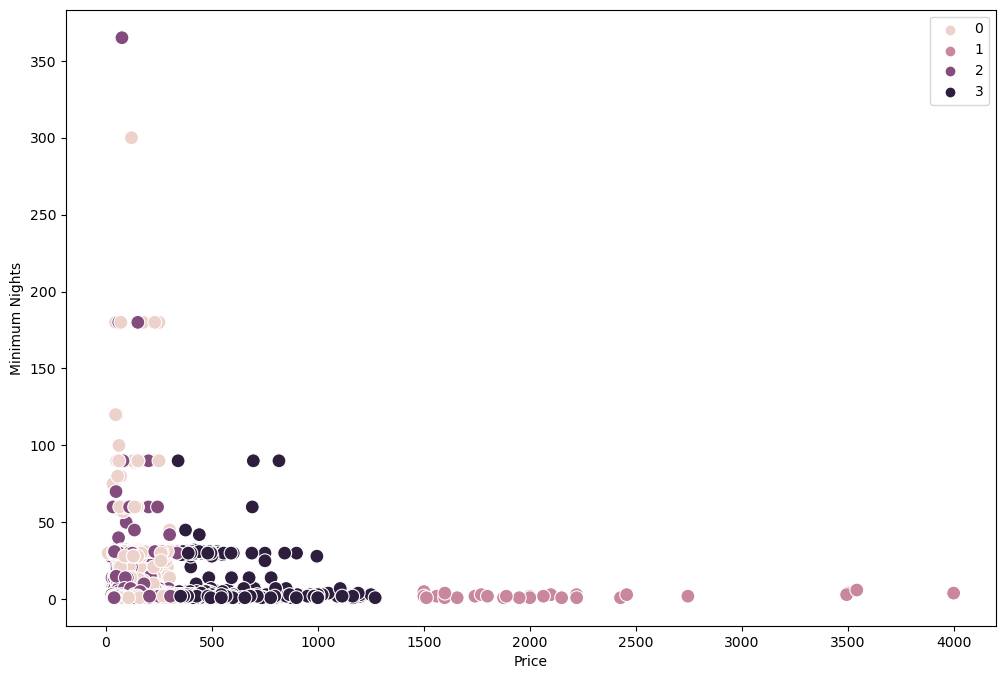

In [64]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_use['price'], y=df_use['minimum_nights'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Minimum Nights') # Label y-axis.
plt.show()

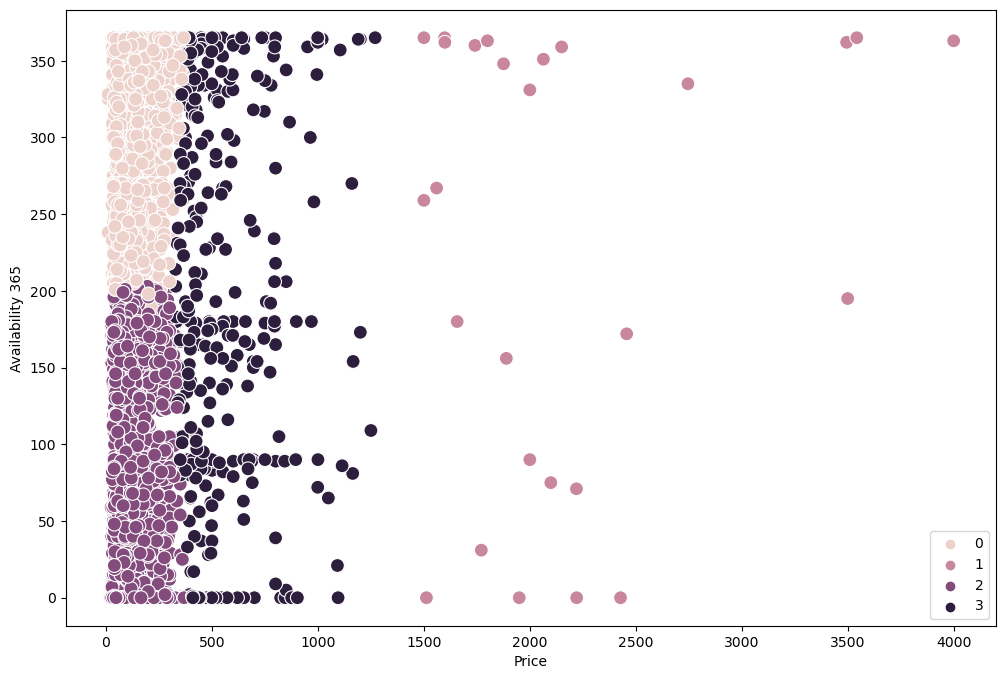

In [65]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_use['price'], y=df_use['availability_365'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Price') # Label x-axis.
plt.ylabel('Availability 365') # Label y-axis.
plt.show()

For the Price vs. Number of Reviews and Price vs. Minimum Nights there seems to be some overlapping in two of the clusters (0 and 2), however I think if I were to see this chart in a 3D model it would show a clearer image of some of that overlap.   Cluster 1 and 0 seem to represent the cheaper Airbnb rentals, cluster 3 is the mid-range priced rentals while cluster 1 is the more expensive rental units. Cluster 1 seems to not be so influenced by number of reviews or minimum stay of nights. 

In [66]:
df_use.loc[df_use['clusters'] == 3, 'cluster'] = 'dark purple'
df_use.loc[df_use['clusters'] == 2, 'cluster'] = 'medium purple'
df_use.loc[df_use['clusters'] == 1, 'cluster'] = 'purple'
df_use.loc[df_use['clusters'] == 0, 'cluster'] = 'pink'

In [70]:
df_use.groupby('cluster').agg({'availability_365':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'price':['mean', 'median']})

availability_365        number_of_reviews               price  \
                          mean median              mean median         mean   
cluster                                                                       
dark purple         194.077612  180.0         34.313433   15.0   547.447761   
medium purple        88.523693   86.0         51.478350   22.0   122.790441   
pink                319.123153  341.0         36.998522   12.0   124.234975   
purple              226.851852  267.0         22.148148   12.0  2180.592593   

                       
               median  
cluster                
dark purple     475.0  
medium purple   100.0  
pink            109.0  
purple         2000.0

- The dark purple has best stats in the availabilty category.  The median number is 180 which is roughly half a year so it is better for the customer that the rentals in this unit will be more available yearly.  While on the other hand, for the rental owner it probably isn't the best that it is vacant for half a year.  The dark purple also has a good average for number of reviews, 15 being the median and 34 being the mean is a good amount of reviews to have for a rental unit.  The price is definitely inbetween the most and least expense, leaving it to be a good middle ground for price.
- The medium purple and the pink are very similiar when it comes to price and number of reviews.  However, the availability means are extremely different with medium purple having a mean of 88 while pink has a mean of 319.  This means there is a group of relativity cheaper rental units that have different availbility during the year, could be from the amount of advertising the medium purple does compared to the pink.
- The purple cluster is the most expensive rentals in the dataset with the mean of their price being 2180. They also have a lot of availability and the lowest amount of reviews, which is probably due to not many people renting these ones out.